In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv("data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
df=df[['sqft_living','sqft_lot','sqft_above','bedrooms', 'bathrooms','price']]
df

,sqft_living,sqft_lot,sqft_above,bedrooms,bathrooms,price
0,1340,7912,1340,3.0,1.50,3.130000e+05
1,3650,9050,3370,5.0,2.50,2.384000e+06
2,1930,11947,1930,3.0,2.00,3.420000e+05
3,2000,8030,1000,3.0,2.25,4.200000e+05
4,1940,10500,1140,4.0,2.50,5.500000e+05
...,...,...,...,...,...,...
4595,1510,6360,1510,3.0,1.75,3.081667e+05
4596,1460,7573,1460,3.0,2.50,5.343333e+05
4597,3010,7014,3010,3.0,2.50,4.169042e+05
4598,2090,6630,1070,4.0,2.00,2.034000e+05


In [6]:
df.loc[:, 'bedrooms'] = df['bedrooms'].astype(int)
df.loc[:, 'bathrooms'] = df['bathrooms'].astype(int)
df.loc[:, 'price'] = df['price'].astype(int)
df

,sqft_living,sqft_lot,sqft_above,bedrooms,bathrooms,price
0,1340,7912,1340,3.0,1.0,313000.0
1,3650,9050,3370,5.0,2.0,2384000.0
2,1930,11947,1930,3.0,2.0,342000.0
3,2000,8030,1000,3.0,2.0,420000.0
4,1940,10500,1140,4.0,2.0,550000.0
...,...,...,...,...,...,...
4595,1510,6360,1510,3.0,1.0,308166.0
4596,1460,7573,1460,3.0,2.0,534333.0
4597,3010,7014,3010,3.0,2.0,416904.0
4598,2090,6630,1070,4.0,2.0,203400.0


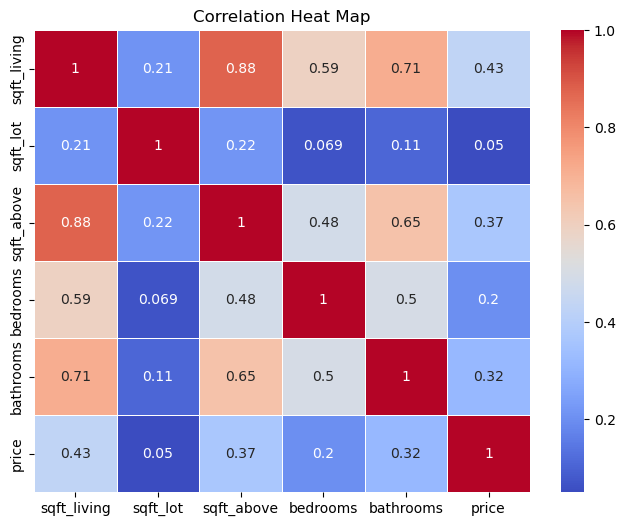

In [7]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()


<Axes: >

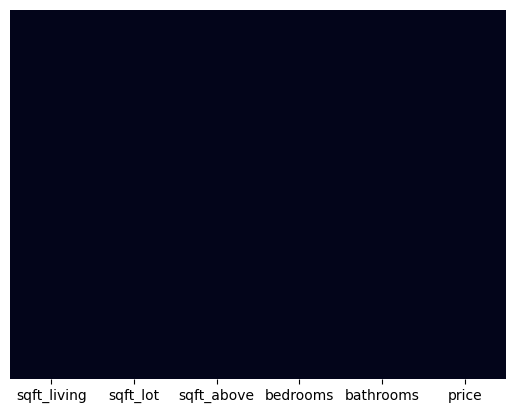

In [8]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
x = df[['sqft_living','sqft_lot','sqft_above','bedrooms', 'bathrooms']]
y = df['price']

In [10]:
lr = LinearRegression()
lr

LinearRegression()

In [11]:

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.25, 0.35, 0.45, 0.15,0.33,0.22,0.44]
results = []

# Define the degree for polynomial features
degree = 2

for ratio in ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=123)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Scale data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    # Train model
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred_train = lr.predict(X_train_scaled)
    y_pred_test = lr.predict(X_test_scaled)
    
    # Evaluate metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results.append((ratio, test_r2))
    
    print(f"Test Size Ratio: {ratio}")
    print("Training set evaluation:")
    print(f"Mean Absolute Error: {train_mae}")
    print(f"Mean Squared Error: {train_mse}")
    print(f"R-squared: {train_r2}")
    print("\nTesting set evaluation:")
    print(f"Mean Absolute Error: {test_mae}")
    print(f"Mean Squared Error: {test_mse}")
    print(f"R-squared: {test_r2}")
    print("\n")

# Display results
for ratio, score in results:
    print(f"Test Size Ratio: {ratio}, R² Score: {score:.4f}")





Test Size Ratio: 0.1
Training set evaluation:
Mean Absolute Error: 179274.71131271578
Mean Squared Error: 270635873425.44504
R-squared: 0.17444693348095464

Testing set evaluation:
Mean Absolute Error: 163396.88911308142
Mean Squared Error: 63945639125.97228
R-squared: 0.7193430466821822


Test Size Ratio: 0.2
Training set evaluation:
Mean Absolute Error: 180380.29954269555
Mean Squared Error: 294496029871.47253
R-squared: 0.16485044690889494

Testing set evaluation:
Mean Absolute Error: 169691.4267174498
Mean Squared Error: 71385458486.99779
R-squared: 0.6005128487558951


Test Size Ratio: 0.3
Training set evaluation:
Mean Absolute Error: 180756.3577020061
Mean Squared Error: 324687573088.3615
R-squared: 0.14568914813758982

Testing set evaluation:
Mean Absolute Error: 172325.4119427503
Mean Squared Error: 75498523234.67041
R-squared: 0.5626932739091031


Test Size Ratio: 0.4
Training set evaluation:
Mean Absolute Error: 185641.84195877906
Mean Squared Error: 370124484547.08795
R-squa

In [12]:
X_test,y_test

(      sqft_living  sqft_lot  sqft_above  bedrooms  bathrooms
 4108         3176     13391        2726       3.0        2.0
 2770          660      5000         660       2.0        1.0
 4164         2700      8572        2700       2.0        2.0
 1846          960      4920         960       2.0        1.0
 3176         2341      9594        2341       4.0        2.0
 ...           ...       ...         ...       ...        ...
 2848         1440      4225        1440       2.0        1.0
 2438         2320      4960        1720       5.0        3.0
 2997         2780     10192        2780       5.0        2.0
 2960         2550      4770        2550       4.0        2.0
 3496         4480      5000        3420       5.0        3.0
 
 [2024 rows x 5 columns],
 4108     819000.0
 2770     175000.0
 4164     810000.0
 1846     280000.0
 3176     640000.0
           ...    
 2848     437000.0
 2438     822500.0
 2997     830000.0
 2960     371000.0
 3496    1990000.0
 Name: price, Lengt

In [15]:
# Predict price for a new house
new_house = pd.DataFrame([[2780   ,  10192    ,    2780   ,    5.0    ,    2.0]], columns=['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms'])
new_house_poly = poly.transform(new_house)
new_house_scaled = scaler.transform(new_house_poly)
predicted_price = lr.predict(new_house_scaled)
print(f"Predicted price for the example house: ${predicted_price[0]:,.2f}")

Predicted price for the example house: $644,537.73


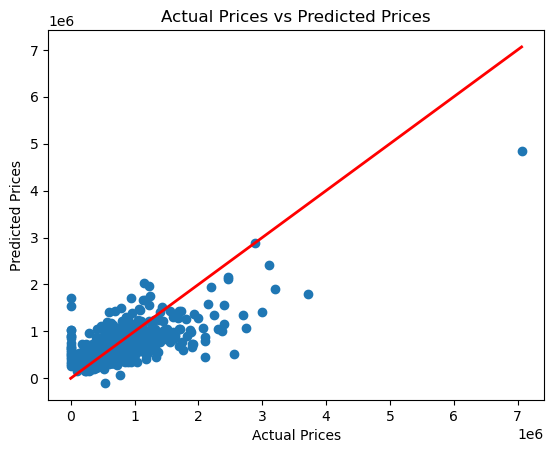

In [14]:
# Visualization
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()
